#### Building  first ANN with Keras

In [49]:
import tensorflow as tf
from tensorflow.keras  import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.datasets  import mnist



import numpy as np
import matplotlib.pyplot as plt

In [50]:
(X_train,y_train),( X_test, y_test) = mnist.load_data()

#### Data Preprocessing
* Reshape the data: Convert the 28*28 images into a flat array of 784 pixels (28*28)
* Normalize the data: Scale pixel values to the range [0,1]
* Convert  labels to categorical using OneHot Encoding format 

In [51]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### Defining the Model
1. Sequential API is used to defint the model:
* An input layer with 784 neurons (one for each pixel)
* One hidden layer with 512 neurons and ReLU activation function
* An output layer with 10 neurons (one for each grid) and softmax activation function.

In [52]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape= (28*28,)))
model.add(Dense(units=10, activation='softmax'))

C:\Users\Kaybee\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### compiling model

In [53]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape= (28*28,)))
model.add(Dense(units=10, activation='softmax'))

#### Training the Model
* Training data: x_train & y_train
* Number of epochs: How many times the model will see the entire dataset (let's use 10)
* Batch Size: Number of samples per gradient update( say 20%)
* Validation split: Fraction of the training data to be used as validation data (say 20%)

In [54]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split= 0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8552 - loss: 0.5139 - val_accuracy: 0.9569 - val_loss: 0.1551
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9610 - loss: 0.1361 - val_accuracy: 0.9669 - val_loss: 0.1138
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9762 - loss: 0.0815 - val_accuracy: 0.9722 - val_loss: 0.0954
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9840 - loss: 0.0565 - val_accuracy: 0.9755 - val_loss: 0.0809
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9897 - loss: 0.0414 - val_accuracy: 0.9760 - val_loss: 0.0787
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9909 - loss: 0.0309 - val_accuracy: 0.9766 - val_loss: 0.0776
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9939 - loss: 0.0228 - val_accuracy: 0.9782 - val_loss: 0.0757
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9965 - loss: 0.0164 - val_accu

In [55]:
model.evaluate(X_train, y_train)



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9978 - loss: 0.0110


[0.02353186532855034, 0.9937000274658203]

#### Predictions

In [58]:
predict = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#### Function for plots

In [70]:
def plt_images(images,pred, actual, num_of_image = 10):
    plt.figure(figsize=(11,6))
    for i in range(0, num_of_image):
        plt.subplot(2, num_of_image //2, i + 1)
        plt.imshow(images[i], cmap= 'Blues')
        plt.title(f"True: {np.argmax(actual[i])} \nPred: {np.argmax(pred[i])}")
        plt.axis('off')
    plt.show()

#### Reshape the Images

In [72]:
X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28))

#### Plot:
* Calling the function name with its parameters

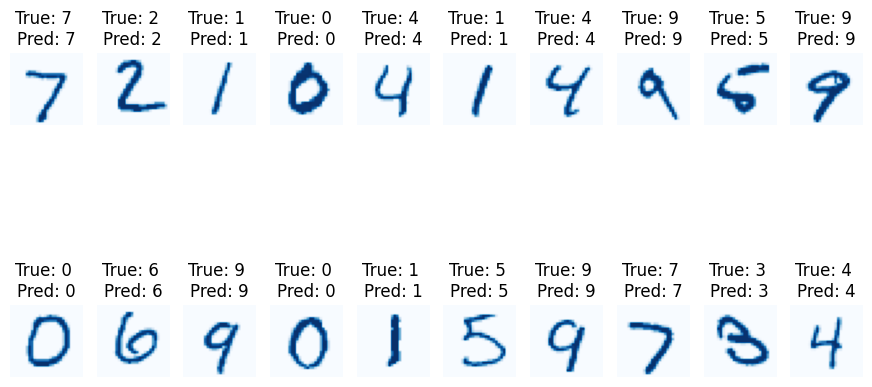

In [73]:
plt_images(images=X_test_reshaped, actual=y_test, pred= predict, num_of_image=20)